# Homework 2.1 - implement N-gram count

Given a text document, implement a python function to collect n-gram counts from the text. First download your datasets of your choice from project Gutenberg. Or you can load it from the URL directly usng the method from NLTK book (https://www.nltk.org/book/ch03.html).

0. Each team should first decide on two books to download frm project Gutenburg(https://www.gutenberg.org). Use wget (example below) to download the txt version of the books. 

1. Please implement your data loading and text cleaning (preprocessing) as well as n-gram count methods in the following class. Feel free to add methods as you need. You can do some exploration to decide level of text cleaning needed. The simplest would be to remove all punctuations, arabic numbers, etc. You can use simple python method, regular expressions, etc. Manually inspect the outcome of your text cleaning. Is it what you expected?

2. Example usage of the class is provided. 

3. Run your code and collect n-gram counts from the book. Print out the top ten unigrams, bigrams and trigrams and their counts. 

4. Plot a histogram of the top 50 unigram, bigrams and trigrams and their counts. What do you observe in the distribution?

5. Repeat steps 1-5 on both books.

In [58]:
import matplotlib.pyplot as plt
import nltk

In [59]:
%%capture
!pip install scattertext

In [3]:
%%capture
!wget https://www.gutenberg.org/files/1513/1513-0.txt
!wget https://www.gutenberg.org/files/84/84-0.txt

In [60]:
from collections import defaultdict
nltk.download('stopwords')

class NgramCount:
    def __init__(self):
        # init
        self.text=""
        self.stop_words = set(nltk.corpus.stopwords.words('english'))
        
        
    def collect_ngram_count(self, n:int):
        """method to collect n-gram counts from text
        Args:
            text: input text document string
            n: n-gram (e.g., 2-gram, 3-gram, etc)
        Returns:
            dict of n-gram counts. e.g., if n==2, 
            the dict keys are all possible bigrams strings from the document, 
            and the values indicate the number of times that bigram appeared in the document
        """
        tokens = self.preprocess()
        if n < 1 or n > len(tokens):
            raise ValueError("n must be at least 1 and no more than the amount of words in the text!")
        
        
        ngram_counts = {}
        for i in range(len(tokens) - n + 1): #loop for however many tuples there are
            ngram = tuple(tokens[i:i+n]) #ngram is a tuple made of the n amount of words from i to i+n
            ngram_counts[ngram] = ngram_counts.get(ngram, 0) + 1 #this adds 1 to the ngram counter each time that ngram is recognized
            
        return ngram_counts
            
    def file_reader(self, file_name:str):
        """method to read text file into string
        Args: 
            file_name: the file name of the document you want to process
        Returns: 
            nothing, but the class variable self.text should be updated to reflect
            a string representation of the entire document 
             
        """
        #open the file, set it to self, but if it's not found, then raise an error
        try:
            with open(file_name,'r') as file:
                self.text = file.read()
        except FileNotFoundError:
            raise FileNotFoundError(f"File not found! Or wrong file name?")
        
        
    def preprocess(self):
        """method for preprocessing the text, including cleaning up the text, tokenize it, etc., using 
        regular expression tools. 
        Returns:
            a clean list of tokens in the text document, e.g., 
            ['The','Project','Gutenberg','eBook','of','Moby-Dick','or','The','Whale','by','Herman','Melville',...]
        """
        if not self.text:
            raise ValueError("use file_reader to read the text before preprocessing!")
        # start reading only after the second *** and third *** because that's where the story actually starts
        start = self.text.find('***', self.text.find('***') + 3) 
        end = self.text.find('***', start + 3)
        
        extracted_text = self.text[start + 3:end] #extract the text from after the second *** and before the third ***
        # remove any irrelevant characters as listed below
        chars_remove = ".,?!1234567890-()[]{}:;\"'_"
        cleaned_text = ''.join([char for char in extracted_text if char not in chars_remove])
        # tokens are in lowercase
        tokens = cleaned_text.lower()
        # strip the tokens of stop words and rejoin them before returning
        cleaner_tokens = [token.strip() for token in tokens.split() if token and token not in self.stop_words]
        
        return cleaner_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/asze01/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Example Usage
```
nc=NgramCount()
nc.file_reader("2701-0.txt")
nc.preprocess()
nc.collect_ngram_count(2)
```
            

In [61]:
nc=NgramCount()
nc.file_reader("84-0.txt")
# nc.file_reader("1513-0.txt")
nc.preprocess()
unigram_counter_Frankenstein = nc.collect_ngram_count(1)
bigram_counter_Frankenstein = nc.collect_ngram_count(2)
trigram_counter_Frankenstein = nc.collect_ngram_count(3)

In [62]:
def print_top_ngrams(ngram_counts, ngram_type, top=10):
    sorted_ngrams = sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)
    top_ngrams = sorted_ngrams[:top]
    #print the top ngrams, separating each word by a comma, and listing the number of times it's seen after
    print(f"Top {top} {ngram_type}:")
    for ngram, count in top_ngrams:
        print(f"{ngram}: {count}")

In [63]:
print_top_ngrams(unigram_counter_Frankenstein, "Unigrams")
print_top_ngrams(bigram_counter_Frankenstein, "Bigrams")
print_top_ngrams(trigram_counter_Frankenstein, "Trigrams")

Top 10 Unigrams:
('one',): 198
('could',): 196
('would',): 183
('yet',): 149
('man',): 129
('upon',): 126
('life',): 111
('father',): 109
('first',): 108
('might',): 108
Top 10 Bigrams:
('old', 'man'): 32
('native', 'country'): 15
('natural', 'philosophy'): 14
('taken', 'place'): 13
('mr', 'kirwin'): 12
('looked', 'upon'): 10
('fellow', 'creatures'): 10
('long', 'time'): 9
('nothing', 'could'): 9
('young', 'man'): 9
Top 10 Trigrams:
('letter', 'mrs', 'saville'): 4
('mrs', 'saville', 'england'): 4
('august', 'th', '—'): 4
('letter', 'letter', 'letter'): 3
('branch', 'natural', 'philosophy'): 3
('“the', 'old', 'man'): 3
('return', 'native', 'country'): 3
('create', 'another', 'like'): 3
('six', 'years', 'passed'): 2
('years', 'passed', 'since'): 2


In [64]:
import matplotlib.pyplot as plt

def plot_histogram(ngram_counts, ngram_type, top_n=10):
    top_ngrams = sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
    ngrams, counts = zip(*top_ngrams)
    
    ngrams = [' '.join(ngram) for ngram in ngrams]
    
    plt.figure(figsize=(20, 15))
    plt.barh(range(len(ngrams)), counts, tick_label=ngrams)
    plt.xlabel("Count")
    plt.ylabel(f"Top {top_n} {ngram_type}")
    plt.title(f"Top {top_n} {ngram_type} Histogram")
    plt.gca().invert_yaxis()
    plt.show()

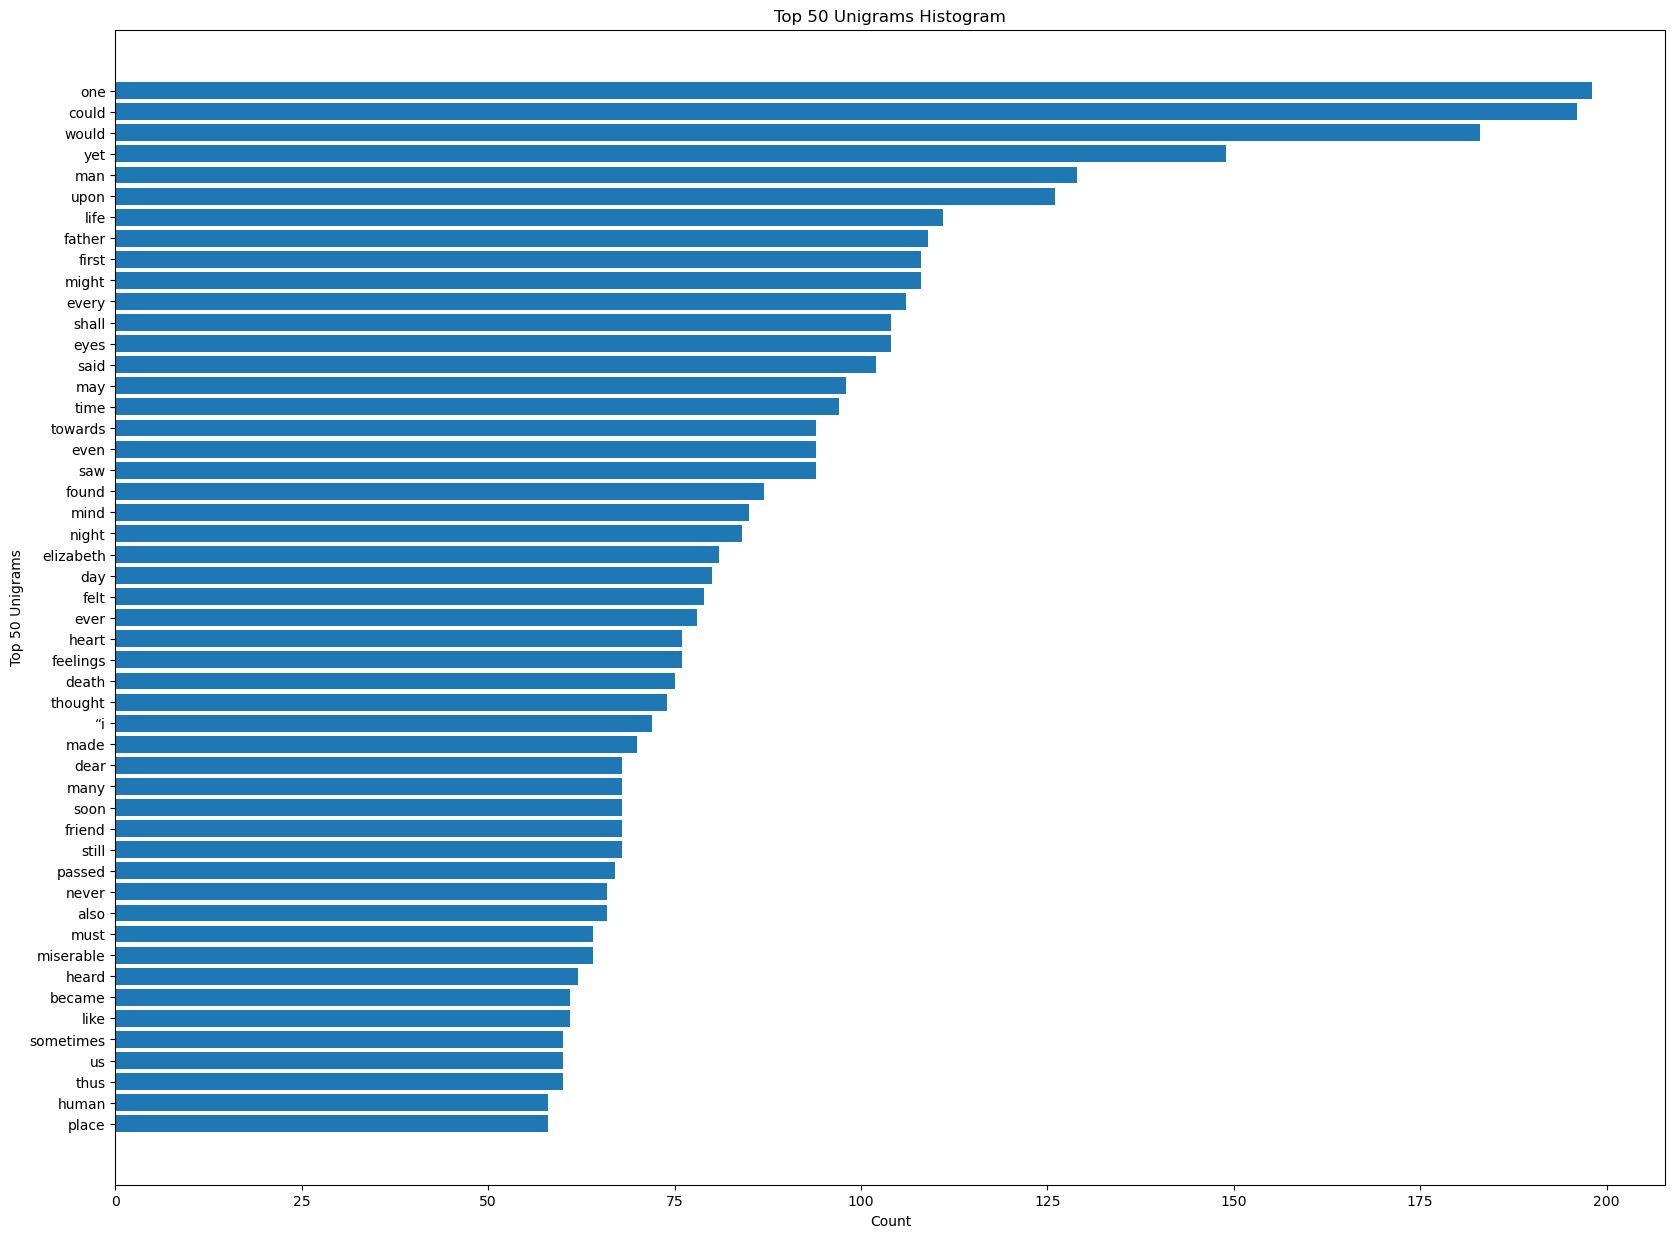

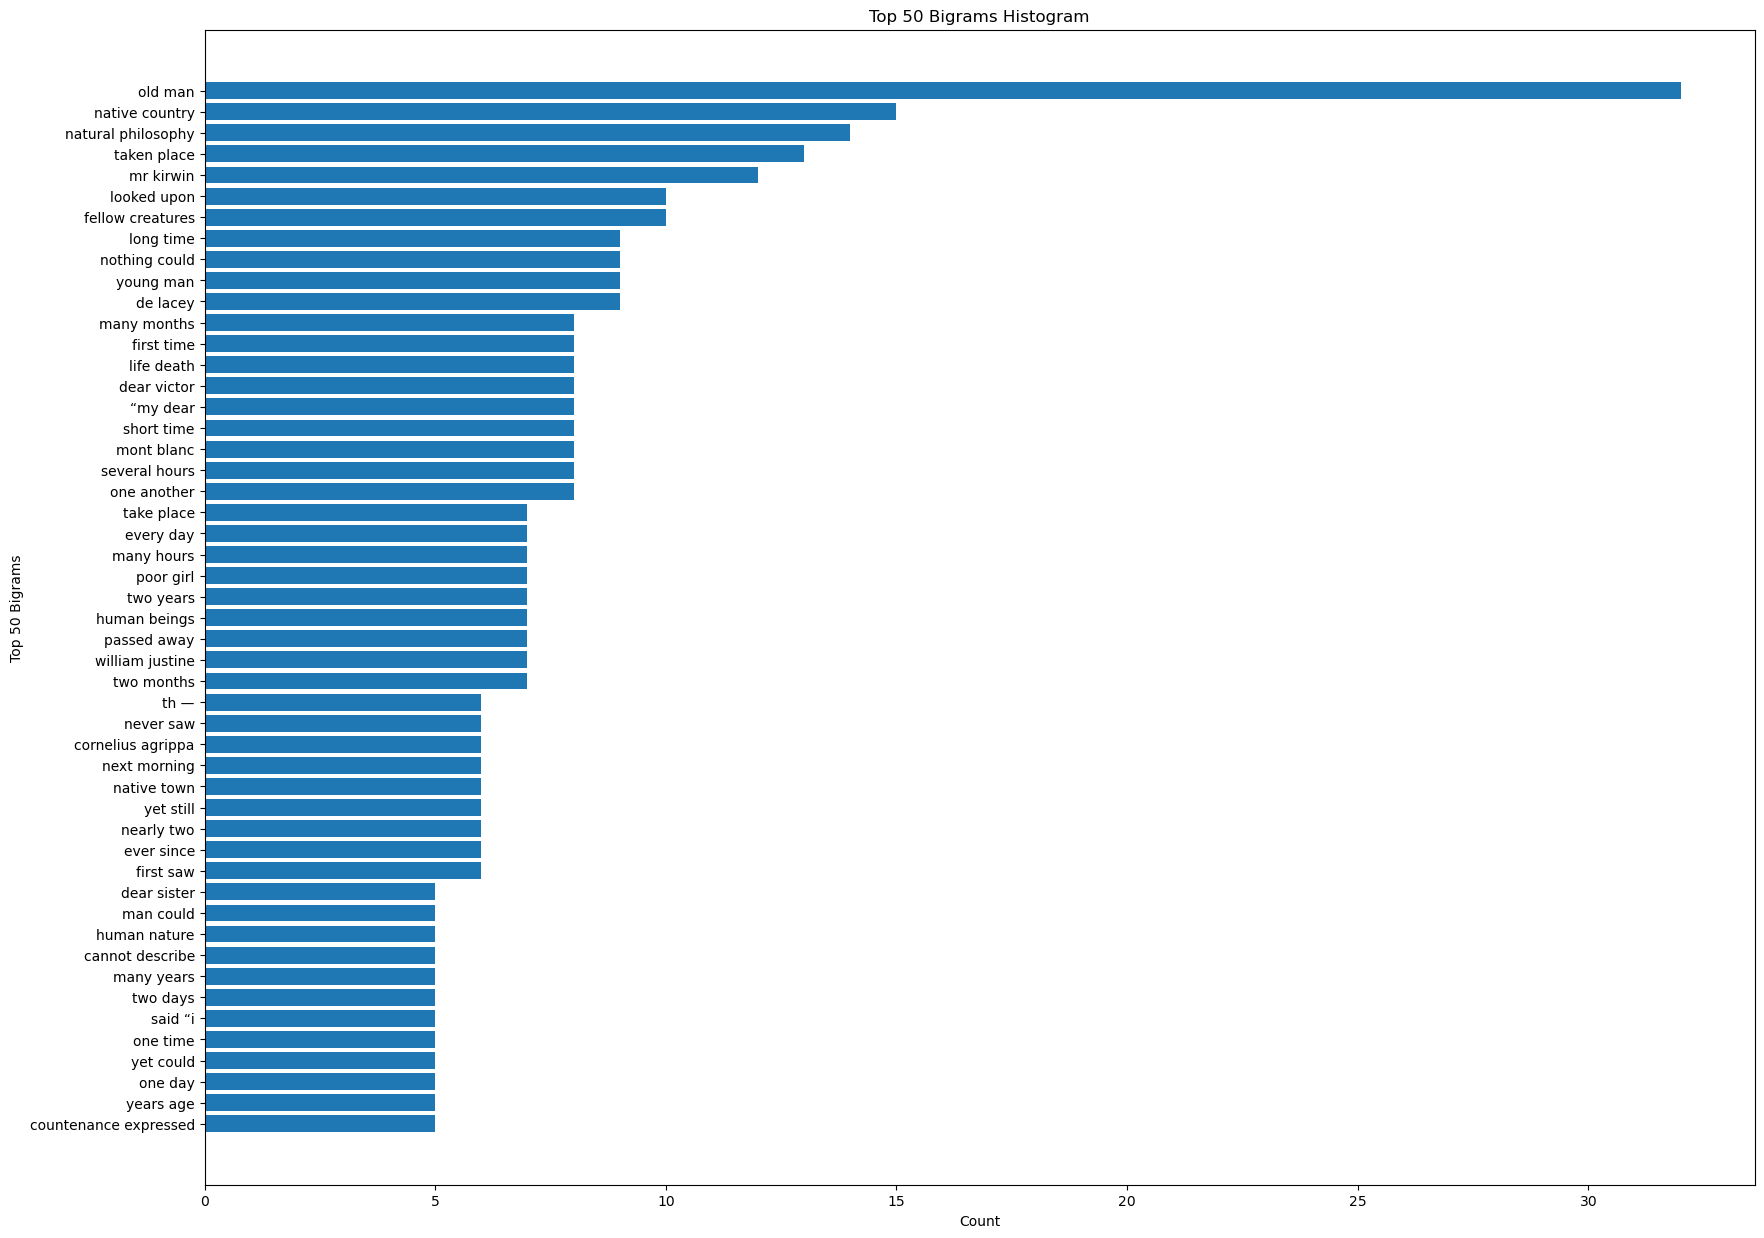

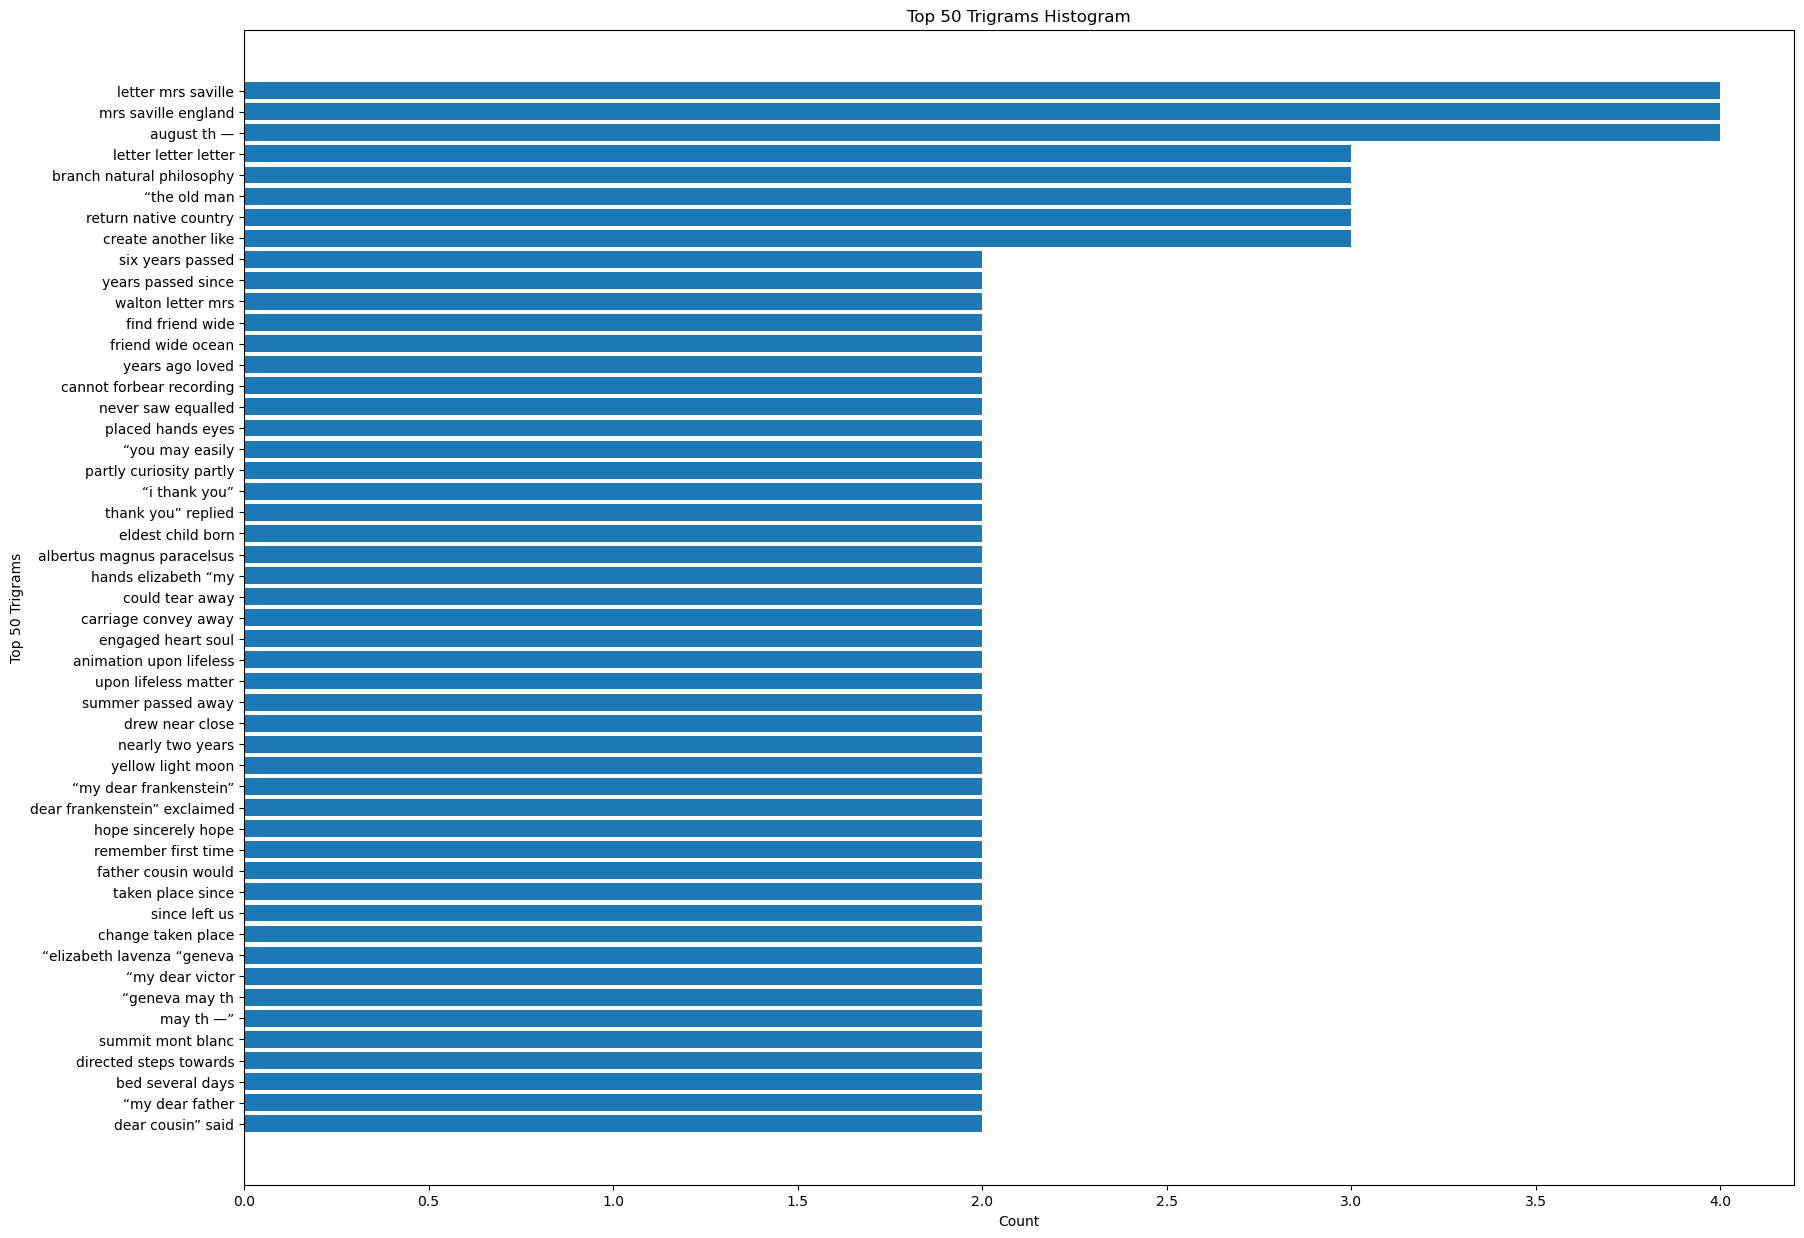

In [65]:
plot_histogram(unigram_counter_Frankenstein, "Unigrams", top_n=50)
plot_histogram(bigram_counter_Frankenstein, "Bigrams", top_n=50)
plot_histogram(trigram_counter_Frankenstein, "Trigrams", top_n=50)

In [66]:
nc=NgramCount()
# nc.file_reader("84-0.txt")
nc.file_reader("1513-0.txt")
nc.preprocess()
unigram_counter_RJ = nc.collect_ngram_count(1)
bigram_counter_RJ = nc.collect_ngram_count(2)
trigram_counter_RJ = nc.collect_ngram_count(3)

In [67]:
print_top_ngrams(unigram_counter_RJ, "Unigrams")
print_top_ngrams(bigram_counter_RJ, "Bigrams")
print_top_ngrams(trigram_counter_RJ, "Trigrams")

Top 10 Unigrams:
('romeo',): 298
('thou',): 277
('juliet',): 178
('thy',): 170
('nurse',): 146
('capulet',): 141
('love',): 136
('thee',): 135
('shall',): 110
('lady',): 109
Top 10 Bigrams:
('friar', 'lawrence'): 66
('lady', 'capulet'): 60
('thou', 'art'): 28
('art', 'thou'): 23
('thou', 'wilt'): 21
('thou', 'hast'): 21
('exeunt', 'scene'): 16
('good', 'night'): 15
('romeo', 'romeo'): 13
('capulet’s', 'house'): 12
Top 10 Trigrams:
('friar', 'lawrence’s', 'cell'): 10
('capulet', 'lady', 'capulet'): 8
('room', 'capulet’s', 'house'): 6
('hall', 'capulet’s', 'house'): 6
('lady', 'capulet', 'nurse'): 6
('enter', 'friar', 'lawrence'): 6
('capulet’s', 'house', 'scene'): 5
('exeunt', 'scene', 'ii'): 5
('capulet’s', 'house', 'enter'): 5
('enter', 'lady', 'capulet'): 5


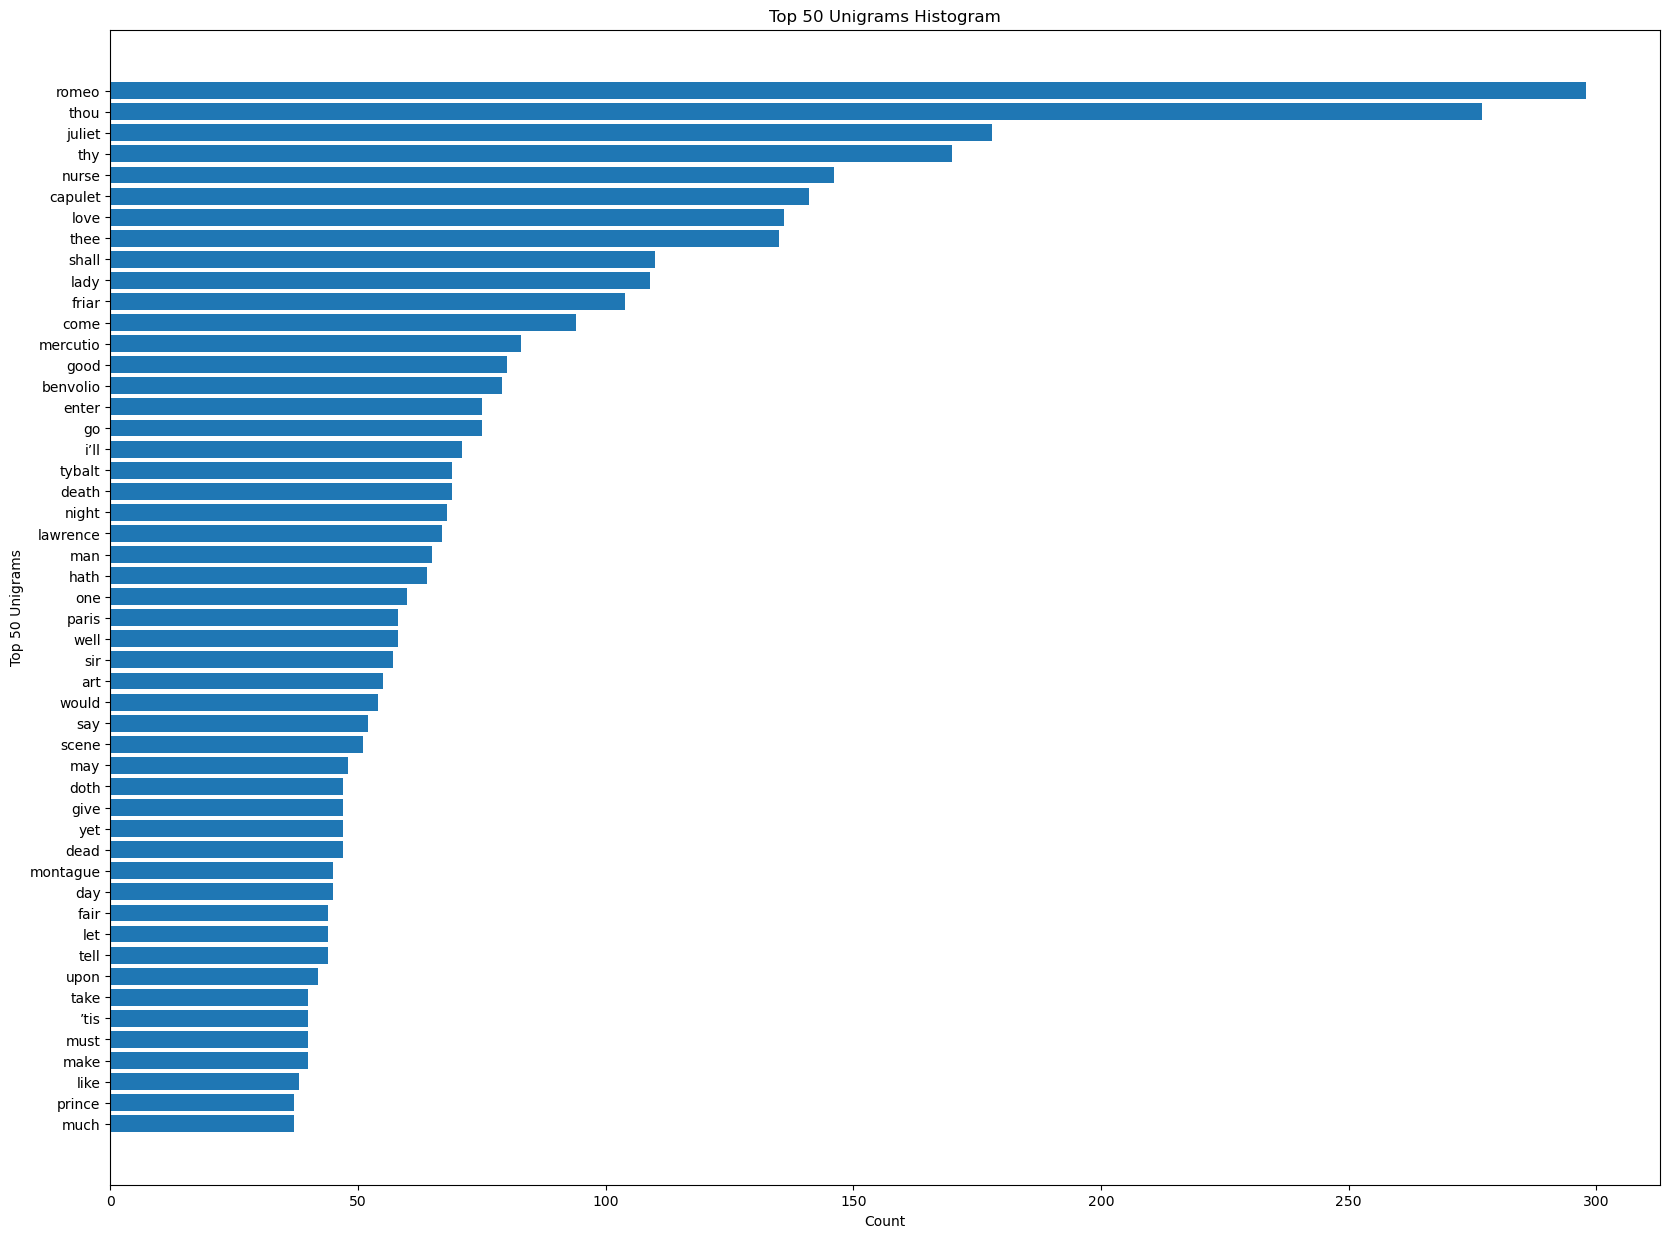

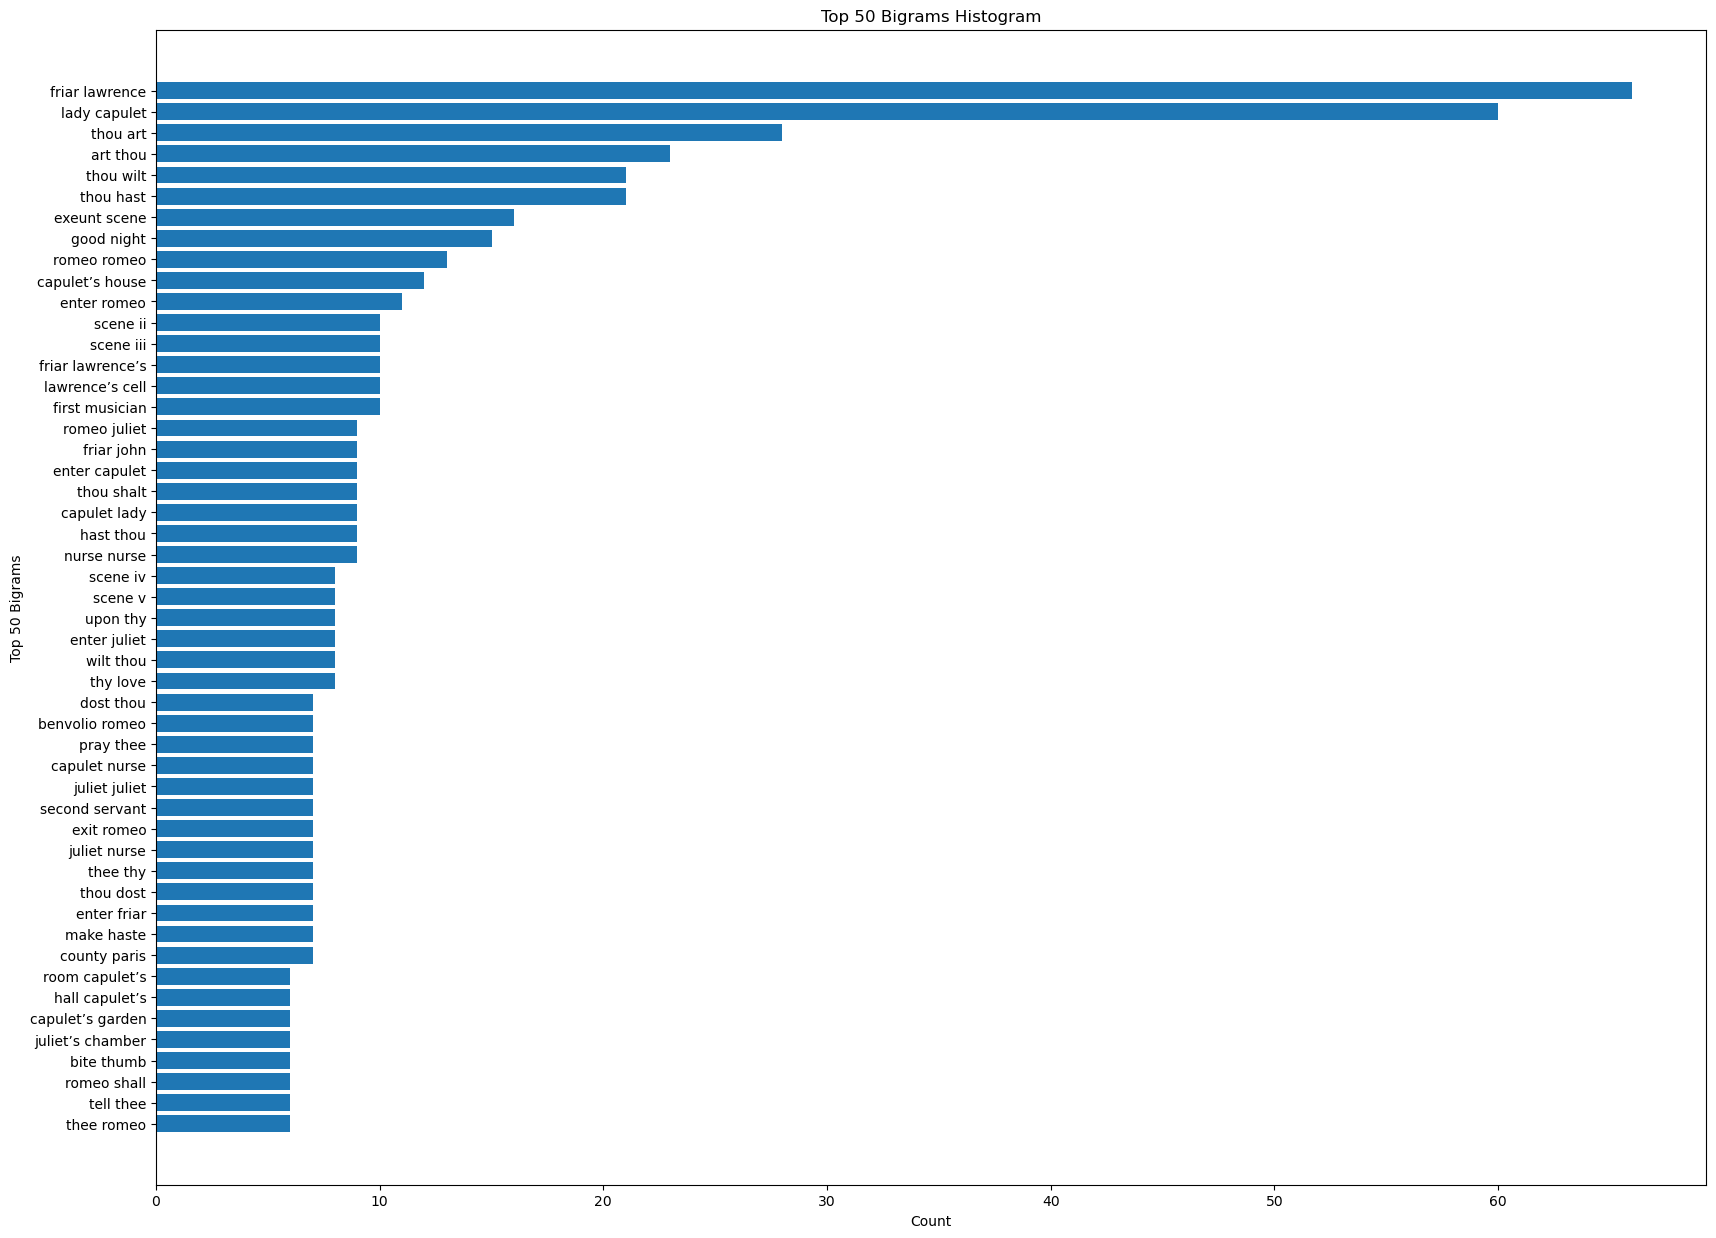

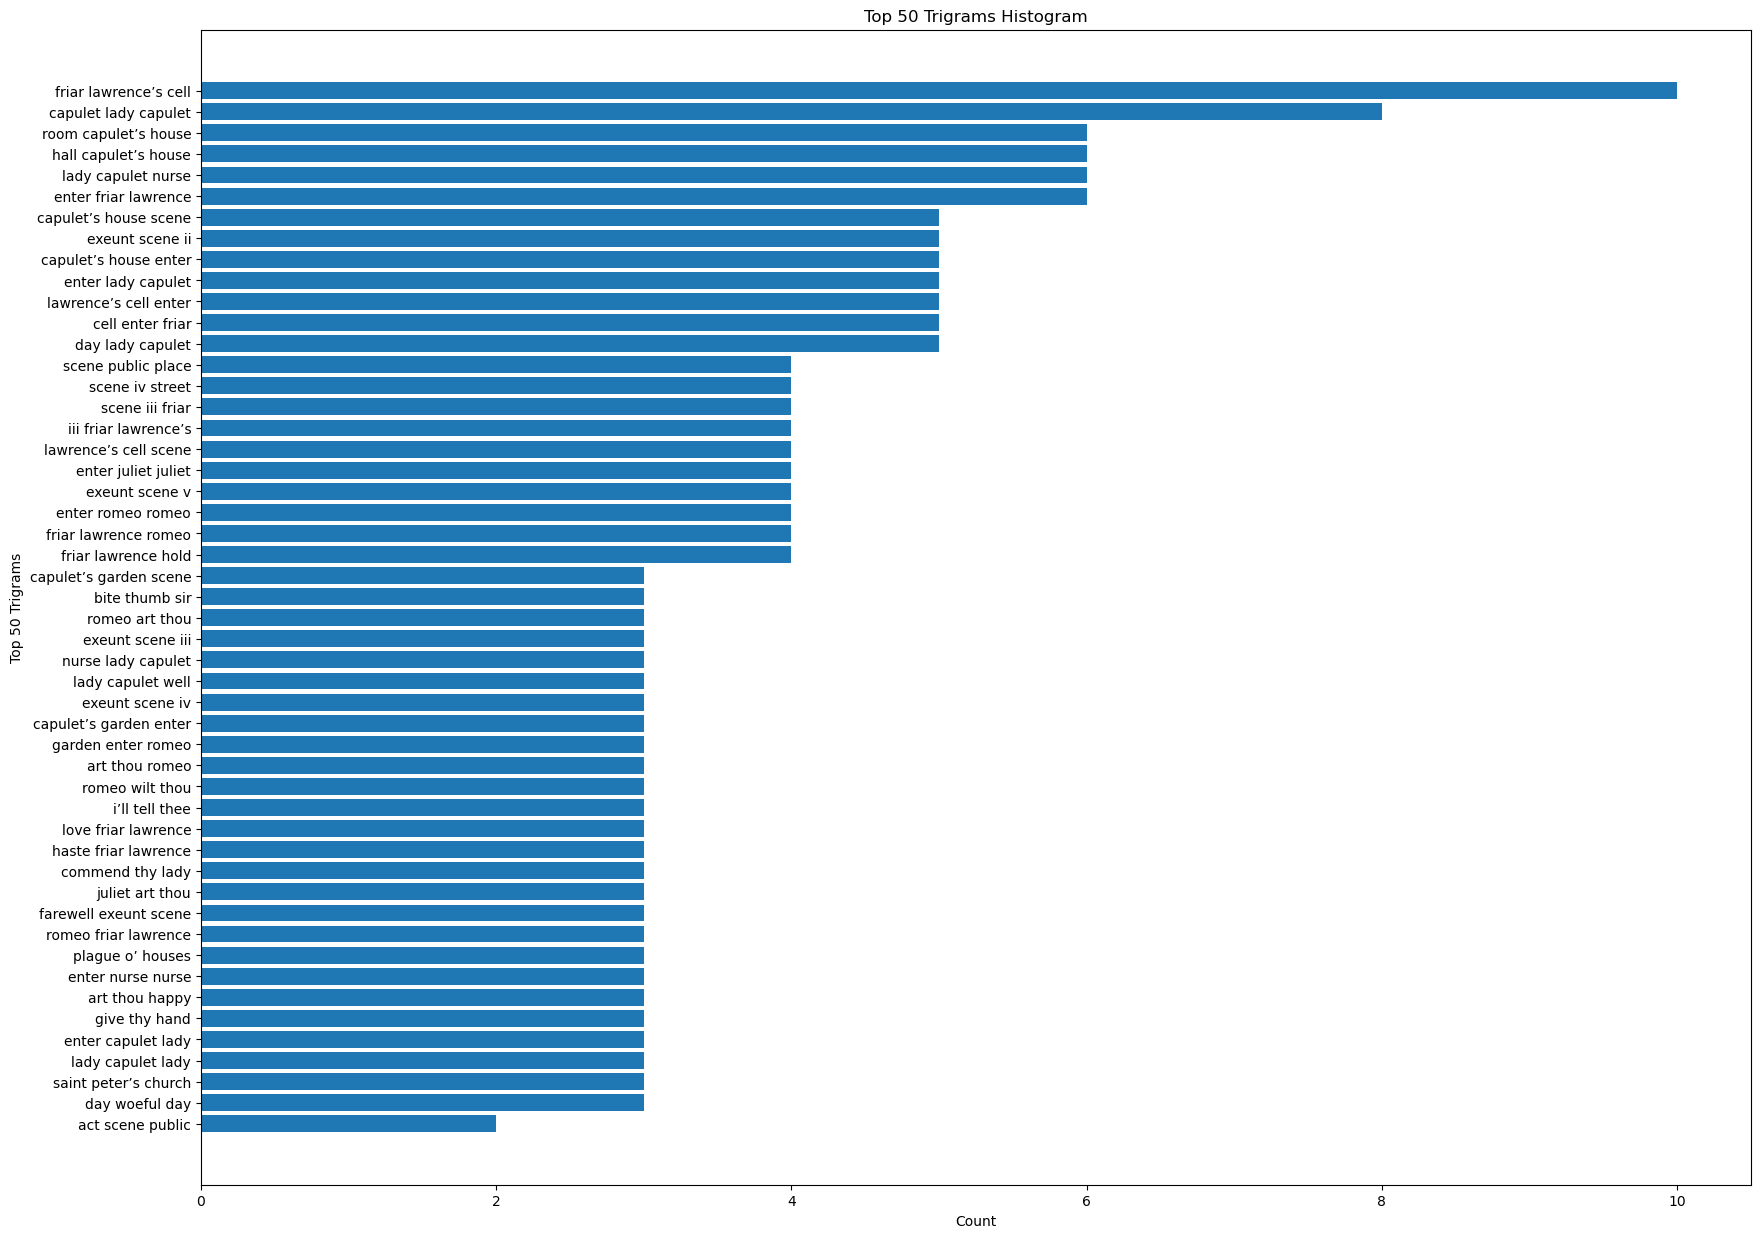

In [68]:
plot_histogram(unigram_counter_RJ, "Unigrams", top_n=50)
plot_histogram(bigram_counter_RJ, "Bigrams", top_n=50)
plot_histogram(trigram_counter_RJ, "Trigrams", top_n=50)

Looking at the distribution for Frankenstein, and Romeo and Juliet, I notice that for the unigram and bigram, names always make it to the top 50 of the list. For example, Romeo, and Juliet are among the top 3 unigrams for Romeo and Juliet, and Elizabeth make it to the top 50 for Frankenstein. For bigrams, certain titles and names such as friar lwarence and lady caputlet for Romeo and Juliet, as well as de lacey for Frankenstein show up. Romeo and Juliet are by far much more greatly affected by the frequency of names. This makes sense as Romeo and Juliet is depicted as a play, where the name of characters are constantly repeated to show that they are speaking. Additionally, I'm seeing the word, scene, show up a lot in the Romeo and Juliet bi and trigrams because it is a play. Overall, Frankenstein's ngrams make more sense than Romeo and Juliet's because it is an actual book and not a play with extra "play" words for actors to reference when performing.

The distribution is positively skewed for uni, bi, and trigrams for both books, with single peaks. The range is much bigger for unigrams, followed by bigrams and then trigrams. As learned in class, we're seeing a Zipfian distribution, where some ngrams are very common (i.e. Romeo and Juliet: Romeo, or thou for uni, friar lawrence and lady capulet for bi, and friar lawrence's cell for tri. Frankenstein: one and could for uni, old man and native country bi, letter mrs saville for tri.). Since Frankenstein and Romeo and Juliet are on very different topics with a very different style of writing, it makes sense that the type of ngrams that are popular in both are very different. You can tell Romeo and Juliet is older, since older words such as thy, thou and thee are popular, and that its a play since words like scene, and character names are very common. If you look at the Frankenstein trigrams, you might be able to tell that it's a book mostly written in past-tense, as all the most common verbs are in past tense, and the word "letter/letters" is very common, implying the story is told through character correspondence.

I improved the ngram program after meeting w/ my team mates by adding stop words, using the nltk package, getting rid of words such as chapter. In the future, I would improve this program further by using nltk even more for preprocessing, and creating an ngram counter unique to each genre of text. An ngram counter for a play, should not be the same as the ngram counter for a fiction novel. They differ subtly by the words they use, and require different preprocessing. Additionally, I may consider filtering character names as it skews the data significantly and doesn't inform the user much of anything.